## Graph

In [6]:
from graphviz import Digraph
from collections import defaultdict

class Graph:
    def __init__(self, edges, directed=False):
        self.directed = directed
        self._vertices = set()
        self.num_vertices = 0
        self.num_edges = 0
        self.edges = defaultdict(list)
        for edge in edges:
            self.insert_edge(edge)
            
    def insert_edge(self, edge):
        u, v, w = edge
        self._vertices.add(u)
        self._vertices.add(v)
        self.edges[u].append((v, w))
        if not self.directed:
            self.edges[v].append((u, w))
        self.num_vertices = len(self._vertices)
        
    def visualize(self):
        graph = Digraph(engine="sfdp")
        for p_vertex in self.edges:
            graph.node(str(p_vertex))
            for (c_vertex, weight) in self.edges[p_vertex]:
                graph.node(str(c_vertex))
                graph.edge(str(p_vertex), str(c_vertex))
        
        return graph
        
    def __str__(self):
        out_str = ""
        for p_vertex, children in self.edges.items():
            p_str = "{} :".format(p_vertex)
            for c_vertex, weight in children:
                p_str += "({}, {}) ".format(c_vertex, weight)
            out_str += p_str + "\n"
        
        return out_str

In [7]:
g = Graph(
    [(0, 5, 0), (0, 1, 0), (0, 4, 0), (1, 4, 0), (1, 2, 0), (2, 3, 0), (4, 3, 0)]
)

In [8]:
print(g)

0 :(5, 0) (1, 0) (4, 0) 
5 :(0, 0) 
1 :(0, 0) (4, 0) (2, 0) 
4 :(0, 0) (1, 0) (3, 0) 
2 :(1, 0) (3, 0) 
3 :(2, 0) (4, 0) 



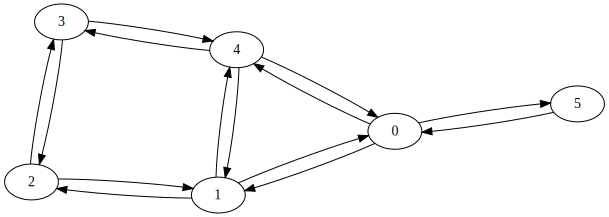

In [9]:
g.visualize()

## Breadth First Search

In [10]:
from queue import Queue

def BFS(graph, start=None):
    if start is None:
        start = next(iter(graph.edges))
    q = Queue()
    q.put(start)
    state = ["undiscovered"] * graph.num_vertices
    state[start] = "discovered"
    parent = [-1] * graph.num_vertices
    
    while not q.empty():
        vertex = q.get()
        for adj, _ in graph.edges[vertex]:
            if state[adj] == "undiscovered":
                state[adj] = "discovered"
                q.put(adj)
                parent[adj] = vertex
        state[vertex] = "processed"
    
    return parent

In [11]:
g = Graph(
    [(0, 5, 0), (0, 1, 0), (0, 4, 0), (1, 4, 0), (1, 2, 0), (2, 3, 0), (4, 3, 0)]
)

In [14]:
parent = BFS(g)

In [15]:
parent

[-1, 0, 1, 4, 0, 0]

## Depth First Search

In [16]:
def DFS(graph, start=None, visited=None, time=-1, times={}):
    if start is None:
        start = next(iter(graph.edges))
    if visited is None:
        visited = set()
    print(start)
    time += 1
    times[start] = [time]
    if start not in visited:
        visited.add(start)
        for adj, weight in graph.edges[start]:
            if adj not in visited:
                time = DFS(graph, adj, visited, time, times)
    time += 1
    times[start].append(time)
    
    return time

In [17]:
g = Graph(
    [(0, 5, 0), (0, 1, 0), (0, 4, 0), (1, 2, 0), (2, 3, 0), (4, 3, 0), (1, 4, 0)]
)

In [18]:
times = {}
DFS(g, times=times)

0
5
1
2
3
4


11

In [19]:
times

{0: [0, 11], 5: [1, 2], 1: [3, 10], 2: [4, 9], 3: [5, 8], 4: [6, 7]}